In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u
from matplotlib import cm
import time
from numpy.random import default_rng

import healpy as hp
import pymaster as nmt
import pandas as pd

import sys
sys.path.insert(0,'../code')
%load_ext autoreload
%autoreload 2
import utils
import generate_random
import correlations
import masks

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [3]:
rng = default_rng(seed=42)

# Load data maps

In [4]:
NSIDE = 64

In [8]:
G_maxs = [19.8, 20.0, 20.2]

In [9]:
maps_nqso_data = []
N_datas = []
for G_max in G_maxs:
    fn_gaia = f'../data/gaia_G{G_max}.fits'
    tab_gaia = utils.load_table(fn_gaia)
    N_data = len(tab_gaia)
    N_datas.append(N_data)
    print(f"Number of data sources: {N_data}")
    map_nqso_data, pixel_indices_data = maps.get_map(NSIDE, tab_gaia['ra'], tab_gaia['dec'], null_val=0)
    maps_nqso_data.append(map_nqso_data)    

Number of data sources: 510290
Number of data sources: 648842
Number of data sources: 812375


# Load selection function maps

In [10]:
map_names = ['dust', 'stars', 'm10']
maps_prob = []
for G_max in G_maxs:
    fn_prob = f"../data/maps/map_probability_{'_'.join(map_names)}_NSIDE{NSIDE}_G{G_max}.fits"
    map_prob = hp.read_map(fn_prob)
    maps_prob.append(map_prob)  

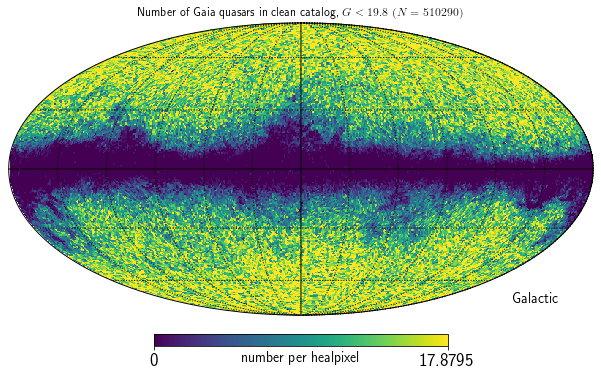

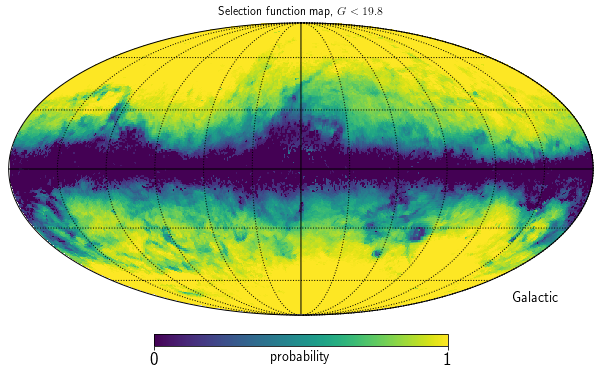

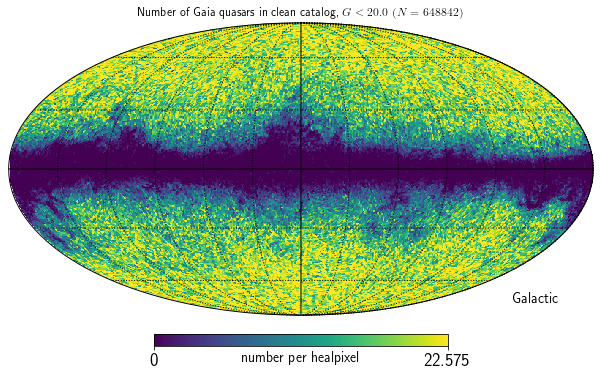

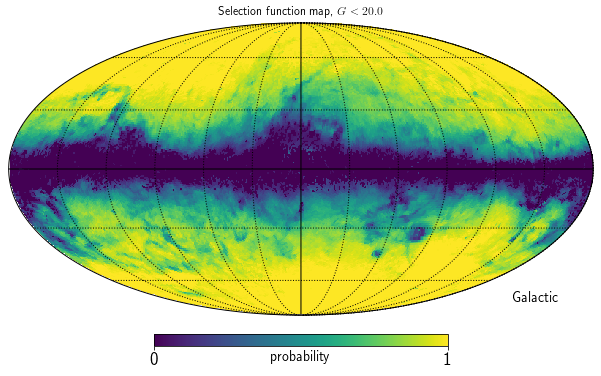

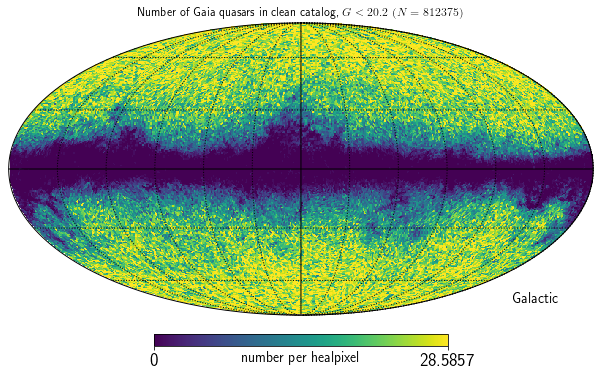

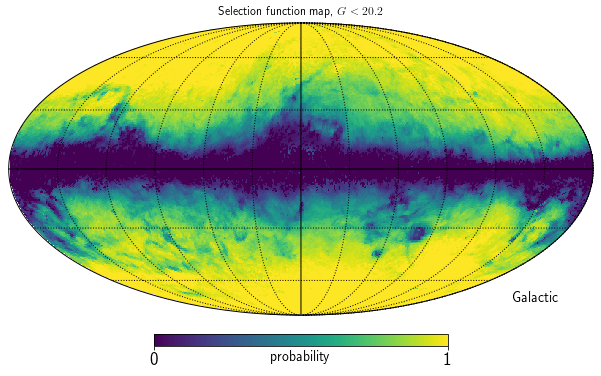

In [11]:
for i in range(len(G_maxs)):
    hp.mollview(maps_nqso_data[i], title=rf"Number of Gaia quasars in clean catalog, $G<{G_maxs[i]}$ $(N={N_datas[i]})$",
            unit=r"number per healpixel", cmap='viridis', coord=['C', 'G'], 
                min=0, max=np.median(maps_nqso_data[i])+np.std(maps_nqso_data[i]))
    hp.graticule()
    hp.mollview(maps_prob[i], title=rf"Selection function map, $G<{G_maxs[i]}$",
            unit=r"probability", cmap='viridis', coord=['C', 'G'], min=0, max=1)
    hp.graticule()

# Checks 

In [12]:
map_names = ['dust', 'stars', 'm10']
NSIDE = 64
G_max = 20.0

In [13]:
fn_prob = f"../data/maps/map_probability_{'_'.join(map_names)}_NSIDE{NSIDE}_G{G_max}_check.fits.npy"
#map_prob = hp.read_map(fn_prob)
map_prob = np.load(fn_prob)

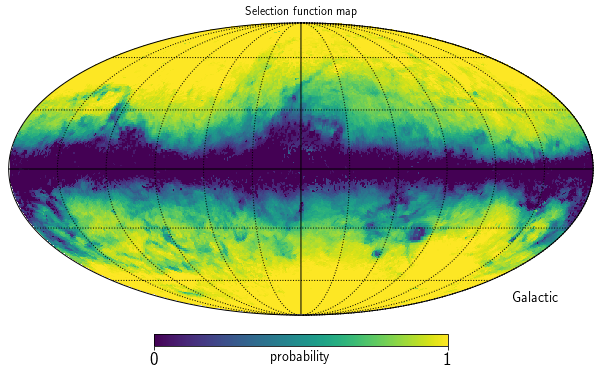

In [14]:
hp.mollview(map_prob, title=rf"Selection function map",
        unit=r"probability", cmap='viridis', coord=['C', 'G'], min=0, max=1)
hp.graticule()

# dN/dz

In [4]:
G_max = 20.0
fn_gaia = f'../data/gaia_G{G_max}.fits'
tab_gaia = utils.load_table(fn_gaia)

4.54


Text(0, 0.5, '$dN/dz$')

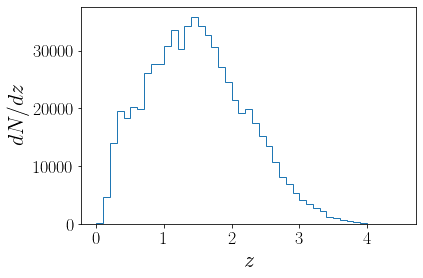

In [5]:
z_spz = tab_gaia['redshift_spz']
print(np.max(z_spz))
bins = np.arange(0, 4.6, 0.1)
plt.hist(z_spz, bins=bins, histtype='step')
plt.xlabel(r'$z$')
plt.ylabel(r'$dN/dz$')

Text(0, 0.5, '$dN/dz$')

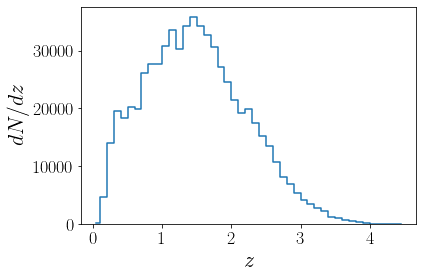

In [6]:
hist, _ = np.histogram(z_spz, bins=bins)
bin_centers = 0.5*(bins[:-1] + bins[1:])
plt.step(bin_centers, hist, where='mid')
plt.ylim(0)
plt.xlabel(r'$z$')
plt.ylabel(r'$dN/dz$')

In [1]:
hist, _ = np.histogram(z_spz, bins=bins)
hist /= area_gaia.to(u.deg**2)
dz = 0.1
bins = np.arange(0, 4.6, dz)
bin_centers = 0.5*(bins[:-1] + bins[1:])
plt.step(bin_centers, hist.value, where='mid')
plt.ylim(0)
plt.xlabel(r'$z$')
plt.ylabel(rf'$N(z) / deg^2 / {dz}$')

NameError: name 'np' is not defined

In [7]:
fn_dndz = f'../data/dndz_G{G_max}.dat'
result = np.array([bins[:-1], bins[1:], hist]).T
#np.savetxt(fn_dndz, result, delimiter=',', fmt=('%.1f', '%.1f', '%d'), header="z_bin_min,z_bin_max,dN/dZ")

In [8]:
print(np.sum(z_spz > 2.2))

115378
